In [4]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics

% end of housekeeping

# Principle Component Analysis (PCA)


These notes are based on a tutorial written by Lisa Smith (no relation)

http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf

PCA is a data reduction method.  Typically we will start with high dimentional data - too high to easily visualize the data, and all the potential relationships.  Using PCA we can "pull out" the principle components that explain most of the variability in the data.  In this way we can reduce a complex datasset to a less complex "transformed" subset of the data.  

We can use this for "typing" to identify how different samples are similar or different from each other (again, we can't easily do this from the original data because there would be just too many dimensions).

It is also possible to use it in reverse - and apply it to new data and see how that new data fits into the existing patterns of the original data.

So let's use Lisa's data ... and plot it.  Then do mean subtraction of each column of data minus it's mean value.


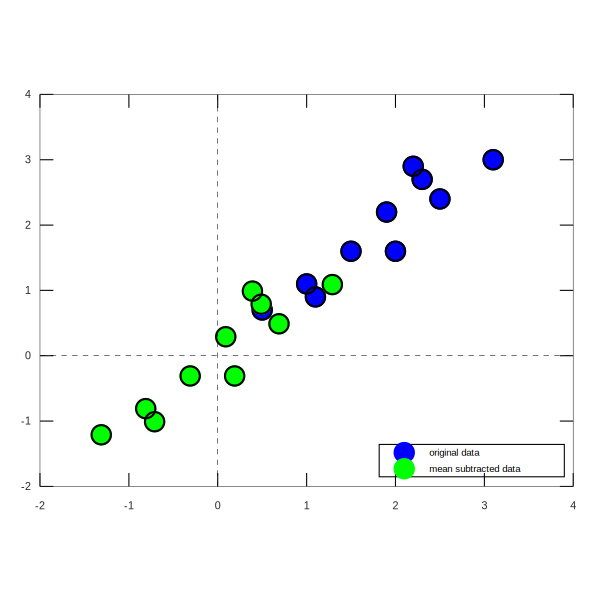

In [5]:
%plot -s 600,600 -f 'svg'
Data =[...
%x y
2.5 2.4
0.5 0.7
2.2 2.9
1.9 2.2
3.1 3.0
2.3 2.7
2 1.6
1 1.1
1.5 1.6
1.1 0.9
];

x=Data(:,1); y=Data(:,2); xbar=mean(x); ybar=mean(y);
X=x-xbar; Y=y-ybar;

plot(x,y,'ko','markerfacecolor','b',X,Y,'ko','markerfacecolor','g');
legend('original data','mean subtracted data','location','SouthEast');
hold on
plot([0 0],[-2 4],'k--')
plot([-2 4],[0 0],'k--')


# calculate the covariance matrix

similar to variance we can define covariance (standard deviation is the square root of the variance).  variance is for one dimension but covariance takes the other dimensions of the data into account.  here the covariance matrix will be 2$\times$2 since there are two data vectors.

$$cov(X,Y)=\dfrac{\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{(n-1)}$$

In [6]:
covmatrix=cov([X Y])

covmatrix =

   0.6166   0.6154
   0.6154   0.7166



# determine eigenvectors and eigenvalues

This is a special way to transform the matrix into orthoganol parts.  You can see from the plot of the two eigenvectors that one describes the main trend in the data, as x goes up so does y, and the other describes the second trend - the ossiclations around the first trend - like noise in our best fit excercises.  the second trend is orthoganol to the first just like we said it would be.

If you look at that graph you can imagine reframming the data based on the new eigenvectors as opposed to the original cartesian coordinates.



Evalue =

   0.049083
   1.284028

Evect =

  -0.7352   0.6779
   0.6779   0.7352



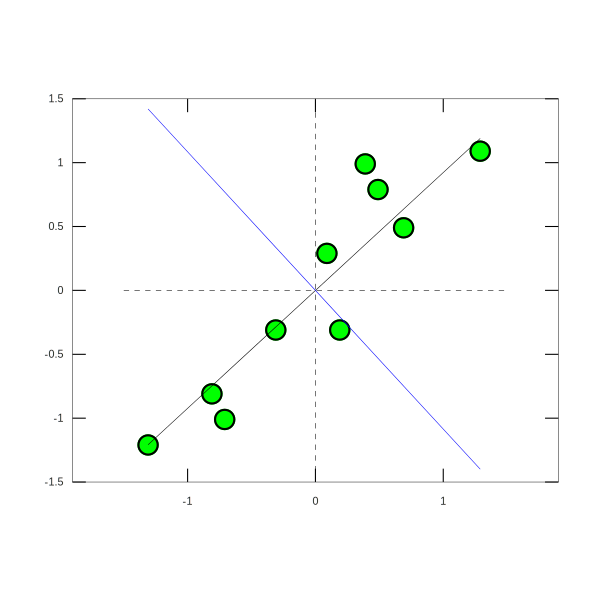

In [7]:
[Evect,Evalue]=eig(covmatrix);  Evalue=diag(Evalue)
Evect

plot(X,Y,'ko','markerfacecolor','g')
hold on
slope1=Evect(2,1)/Evect(2,2); slope2=Evect(1,1)/Evect(2,1); 
trend1=slope1*X; trend2=slope2*X;
plot(X,trend1,'k-',X,trend2,'b-')
axis equal
plot([0 0],[-1.5 1.5],'k--')
plot([-1.5 1.5],[0 0],'k--')


# express the data in rotated "eigenvector" space.

the data dimension can be reduced by projecting into this eigenvector space but not using all the eigenvectors.  We will use the largest eigenvectors and leave out the smaller ones.  So looking at the eigenvalues you can see that the second vector ([0.6779; 0.7351]) is the more significant one.  We can remake the data just using this.

$$FeatureVector = (eig_1, eig_2, ... eig_n)$$

the $FeatureVector$ is a matrix of vectors, sorted in order of largest eigenvalue to smallest - and leaving some off if we want to reduce the dimension of that data (otherwise, we'd just get the original data back).

To get the PCA transformed data you take the transpose of the feature vector and multiply it by the transpose of the mean adjusted original data.

$$FinalData=RowFeatureVector \times RowDataAdjust$$

This will give us back the original data only in terms of the components (PCA1, PCA2, ...) that we choose.

You can see we can get back all the original info about the data but now rotated so that the main trend in the data is the new "x-coordinate" and the smaller trend in the data is the "y-coordinate".



FinalData =

 Columns 1 through 7:

   0.827970  -1.777580   0.992197   0.274210   1.675801   0.912949  -0.099109
  -0.175115   0.142857   0.384375   0.130417  -0.209498   0.175282  -0.349825

 Columns 8 through 10:

  -1.144572  -0.438046  -1.223821
   0.046417   0.017765  -0.162675



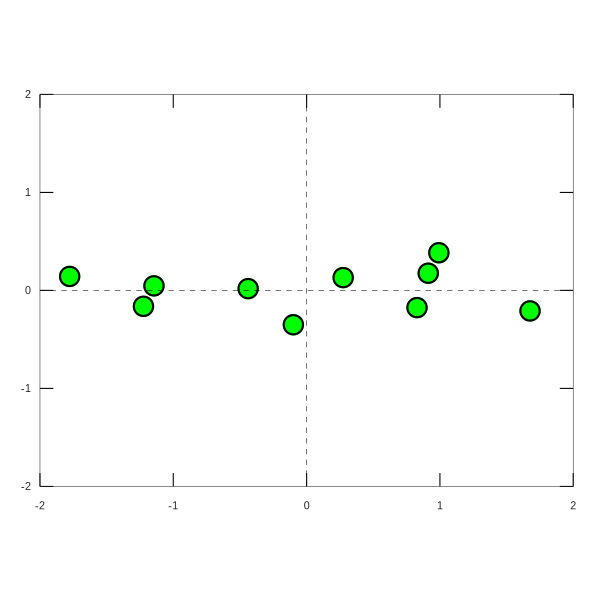

In [10]:
[Esorted, index]=sort(Evalue,'descend');

for i=1:length(index)
    istr=num2str(i);
    txt=['E',istr,'=Evect(:,index(i));']; eval(txt)
end

FinalData=[E1 E2]'*[X Y]';

PCA1=FinalData(1,:); PCA2=FinalData(2,:); 
plot(PCA1,PCA2,'ko','markerfacecolor','g')
hold on
plot([0 0],[-2 2],'k--')
plot([-2 2],[0 0],'k--')


# reconstruct the data using only the most significant component(s)

We can get the data back to original cartesian coordinates  as follows

$$RowDataAdjust=RowFeatureVector^T \times FinalData$$

and add back the means to get the actual original data space.

$$RowDataAdjust=RowFeatureVector^T \times FinalData + OriginalMean$$

if we used both eigenvetors we'd just get the original data back. the point is we can get the original data back minus some less significant trends.

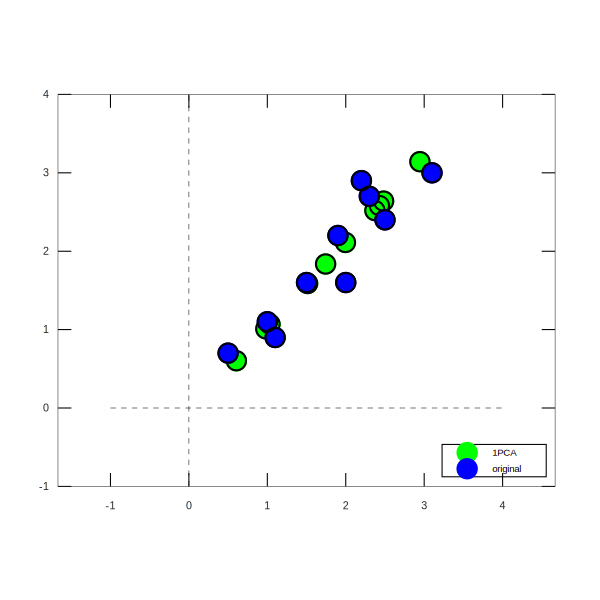

In [14]:
FinalData=[E1]'*[X Y]'; % this is just using the most significant PCA

RowOriginalData=E1*FinalData + [xbar; ybar];

X1PCA=RowOriginalData(1,:); Y1PCA=RowOriginalData(2,:);

plot(X1PCA,Y1PCA,'ko','markerfacecolor','g')

hold on

plot(x,y,'ko','markerfacecolor','b');
legend('1PCA','original','location','SouthEast');
axis equal;
plot([0 0],[-1 4],'k--');
plot([-1 4],[0 0],'k--');

### exercise 8

reproduce the graphs from this lecture in your own mfile.